### $\color{Yellow}{\text{Mohammad Javad Soltani}}$
## To Do List 

>**0. Imports**  

>**1. ZipFile** 

>**2. then Addup Text detrctor:** 

>**3. Creat a Function to Srearch Trough the pictures** 

>**4. Try on main Data:** 

## $\color{brown}{\text{0. Imports:}}$

In [68]:
import sys
import os
if sys.version_info >= (3, 6):
    import zipfile
else:
    import zipfile36 as zipfile

from PIL import Image
from PIL import ImageDraw
import pytesseract
import cv2 as cv
import numpy as np

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')


***

## $\color{brown}{\text{1. First Read ZipFile:}}$

In [98]:
Test_Data = zipfile.ZipFile('small_img.zip')
Test_List = Test_Data.infolist()
Test_Data.printdir()

File Name                                             Modified             Size
a-0.png                                        2019-02-26 22:30:30     21000053
a-1.png                                        2019-02-26 22:30:28     22598429
a-2.png                                        2019-02-26 22:30:28      3650049
a-3.png                                        2019-02-26 22:30:30     18646538


In [107]:
Dict_Data = {}
for i in range(len(Test_List)):
    #display(Image.open(Test_Data.open(Test_List[i])))
    #print(Test_Data.namelist()[i])
    Dict_Data[Test_Data.namelist()[i]] = Image.open(Test_Data.open(Test_List[i]))#Store in a Dict

## $\color{brown}{\text{2. then Addup Text detrctor:}}$

In [5]:
#list that contains the images names
pages_list = list(Dict_Data.keys())

Source_List=[]
for name in pages_list:
    temp_list=[] # [ name of the page , text ] 
    temp_list.append(name)
    #Now That we have page names, let's go for Images and extract thair textes.
    img = Image.open('small_img/'+name)
    pytesseract.pytesseract.tesseract_cmd=r'C:\Program Files\Tesseract-OCR\tesseract.exe'
    temp_list.append(pytesseract.image_to_string(img).replace('-\n',''))
    #Now we add this image and text as a list to the source_List
    Source_List.append(temp_list)

In [6]:
Source_List[0][1]

"Che Michigan Daily\n\nAnn Arbor, Michigan\n\nWednesday, November 5, 2014\n\nmichigandaily.com\n\nBIG DAY FOR REPUBLICANS\n\nSNYDER EARNS SECOND TERM; G.O.P. TAKES CONTROL OF U.S. SENATE\n\nSTATE\n\nEXECUTIVE\nGOVERNOR\nRick Snyder (R)\n\nLIEUTENANT\nGOVERNOR\nBrian Calley (R)\n\nSECRETARY OF\nSTATE\nRuth Johnson (R)\n\nSTATE\nJUDICIAL\n\nATTORNEY GENERAL\nBill Schuette CR)\n\nMICHIGAN\nLEGISLATIVE\n\nMICHIGAN STATE\nSENATE\nRebekah Warren (D)\n\nMICHIGAN HOUSE\nOF REPRESENTATIVES\nJeff Irwin CD)\n\nU.S.\nLEGISLATIVE\n\nU.S. SENATE\nGary Peters (D)\n\nU.S. HOUSE OF\nREPRESENTATIVES\nDebbie Dingell (D)\n\nWASHTENAW\nCOUNTY\n\nPROBATE COURT\nJulia Owdziej (D)\n\nCIRCUIT COURT\nPatrick Conlin (D)\n\nANN ARBOR\nMAYOR\nChristopher Taylor (D)\n\nCITY COUNCIL\n\nSumi Kailasapathy (D)\nChuck Warpehoski (D)\nJulie Grand (D)\nGraydon Kraphol (D)\nKirk Westphal (D)\n\nREGENTS\n\nToo close to call\n\nHI: 51\nLO: 30\n\nWEATHER\nTOMORROW\n\n‘ali a\n\nTOP: Republican Gov. Rick Snyder celebrates after

In [7]:
'Christopher' in Source_List[0][1]

True

__so as we see me can sucessfully detect texes from Images__

## $\color{brown}{\text{3. Creat a Function to Srearch Trough the pictures:}}$

In [91]:
def search(text,folder):
    for temp in Source_List:
        if text in temp[1]:
            print(f'There is {text}in ',temp[0])
#               Now we should try to Extract faces:              
            try:
                img = Dict_Data[temp[0]]
                faces = (face_cascade.detectMultiScale(np.array(img),1.35,4)).tolist()
#                 storing the boxes of all faces detected in each image
                faces_in_each = []
                
                for x,y,w,h in faces:
                    faces_in_each.append(img.crop((x,y,x+w,y+h)))
#                     modifying local data structure 
                contact_sheet = Image.new(img.mode, (550,110*int(np.ceil(len(faces_in_each)/5))))
#                     contact sheet modification to display each iteration's result
                x = 0;y = 0
#                     Resizeing base on HINT4
                for face in faces_in_each:
                    face.thumbnail((110,110))
                    contact_sheet.paste(face, (x, y)) 
                    if x+110 == contact_sheet.width:
                        x=0;y=y+110
                    else:
                        x=x+110
                        
                display(contact_sheet)
            except:
                print(f'Look like there is not any $Faces$ in ',temp[0])


There is Christopherin  a-0.png


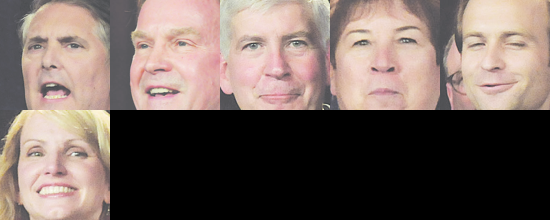

There is Christopherin  a-3.png


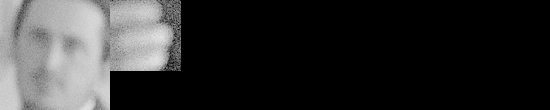

In [92]:
search("Christopher",'small_img/')


## $\color{brown}{\text{4. Try on main Data:}}$

__Repeat Step 1 - 4__

In [100]:
#1.Zip
Test_Data = zipfile.ZipFile('images.zip')
Test_List = Test_Data.infolist()
Test_Data.printdir()

File Name                                             Modified             Size
a-0.png                                        2019-01-06 14:44:26     21000053
a-1.png                                        2019-01-06 14:44:30     22598429
a-10.png                                       2019-01-06 14:45:14     18166003
a-11.png                                       2019-01-06 14:45:14      7458745
a-12.png                                       2019-01-06 14:45:16      2421677
a-13.png                                       2019-01-06 14:45:20     26822842
a-2.png                                        2019-01-06 14:44:34      3650049
a-3.png                                        2019-01-06 14:44:46     18646538
a-4.png                                        2019-01-06 14:44:48      3993918
a-5.png                                        2019-01-06 14:44:52     16686162
a-6.png                                        2019-01-06 14:44:58     41638883
a-7.png                                 

In [106]:
#2.Creat_Dict
Dict_Data = {}
for i in range(len(Test_List)):
    #display(Image.open(Test_Data.open(Test_List[i])))
    #print(Test_Data.namelist()[i])
    Dict_Data[Test_Data.namelist()[i]] = Image.open(Test_Data.open(Test_List[i]))#Store in a Dict


In [104]:
#3.Text detector:
#list that contains the images names
pages_list = list(Dict_Data.keys())

Source_List=[]
for name in pages_list:
    temp_list=[] # [ name of the page , text ] 
    temp_list.append(name)
    #Now That we have page names, let's go for Images and extract thair textes.
    img = Image.open('images/'+name)
    pytesseract.pytesseract.tesseract_cmd=r'C:\Program Files\Tesseract-OCR\tesseract.exe'
    temp_list.append(pytesseract.image_to_string(img).replace('-\n',''))
    #Now we add this image and text as a list to the source_List
    Source_List.append(temp_list)
    

There is Markin  a-0.png


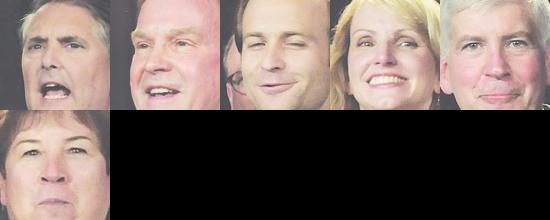

There is Markin  a-1.png


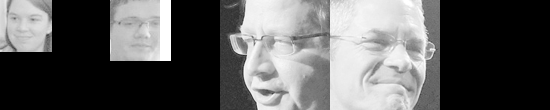

There is Markin  a-10.png
Look like there is not any $Faces$ in  a-10.png
There is Markin  a-13.png


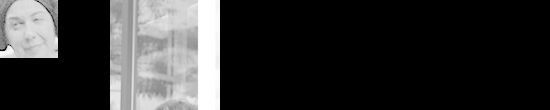

There is Markin  a-2.png


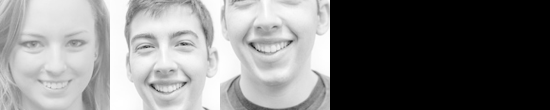

There is Markin  a-3.png


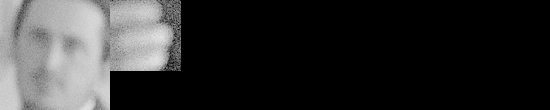

There is Markin  a-8.png
Look like there is not any $Faces$ in  a-8.png


In [105]:
search("Mark",'images/')


$:)$